In [103]:
#!pip install category_encoders==2.*
#!pip install eli5
#!pip install pdpbox
#!pip install shap
#!pip install pandas-profiling==2.*

In [104]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance

In [105]:
#from google.colab import files
#uploaded = files.upload()

In [106]:
df = pd.read_csv('Entire wta data - Sheet1.csv', header=0, low_memory=False)

In [107]:
df

tourney_id                tourney_name surface  \
0                            2000-D001   Fed Cup G1 PO: JPN vs CHN    Hard   
1                            2000-D001   Fed Cup G1 PO: JPN vs CHN    Hard   
2                            2000-D002   Fed Cup WG SF: USA vs BEL  Carpet   
3                            2000-D002   Fed Cup WG SF: USA vs BEL  Carpet   
4                            2000-D003   Fed Cup WG SF: CZE vs ESP  Carpet   
...                                ...                         ...     ...   
34079  2022-W-FC-2022-QLS-M-ROU-POL-01  BJK Cup QLS R1: ROU vs POL    Hard   
34080  2022-W-FC-2022-QLS-M-USA-UKR-01  BJK Cup QLS R1: USA vs UKR    Hard   
34081  2022-W-FC-2022-QLS-M-USA-UKR-01  BJK Cup QLS R1: USA vs UKR    Hard   
34082  2022-W-FC-2022-QLS-M-USA-UKR-01  BJK Cup QLS R1: USA vs UKR    Hard   
34083  2022-W-FC-2022-QLS-M-USA-UKR-01  BJK Cup QLS R1: USA vs UKR    Hard   

       draw_size tourney_level  tourney_date  match_num  winner_id  \
0              4             D      20000430          1     201419   
1              4             D      20000430          2     200085   
2              4             D      20001122          1     200652   
3              4             D      20001122          2     200128   
4              4             D      20001121          1     200017   
...          ...           ...           ...        ...        ...   
34079          4             D      20220415          3     216347   
34080          4             D      20220415          1     201590   
34081          4             D      20220415          2     202468   
34082          4             D      20220415          3     215035   
34083          4             D      20220415          4     215290   

      winner_seed winner_entry  ... l_1stIn l_1stWon  l_2ndWon l_SvGms  \
0             NaN          NaN  ...     NaN      NaN       NaN     NaN   
1             NaN          NaN  ...     NaN      NaN       NaN     NaN   
2             NaN          NaN  ...     NaN      NaN       NaN     NaN   
3             NaN          NaN  ...     NaN      NaN       NaN     NaN   
4             NaN          NaN  ...     NaN      NaN       NaN     NaN   
...           ...          ...  ...     ...      ...       ...     ...   
34079         NaN          NaN  ...    21.0      7.0       1.0     6.0   
34080         NaN          NaN  ...    54.0     36.0      20.0    12.0   
34081         NaN          NaN  ...    29.0     16.0       3.0     7.0   
34082         NaN          NaN  ...    36.0     24.0      16.0     9.0   
34083         NaN          NaN  ...    34.0     22.0       6.0     9.0   

       l_bpSaved  l_bpFaced winner_rank winner_rank_points loser_rank  \
0            NaN        NaN       190.0              121.0      125.0   
1            NaN        NaN        22.0             1230.0       96.0   
2            NaN        NaN         4.0             3255.0       48.0   
3            NaN        NaN         2.0             5022.0       18.0   
4            NaN        NaN         9.0             2132.0       54.0   
...          ...        ...         ...                ...        ...   
34079        0.0        6.0         1.0             6711.0      324.0   
34080        4.0        8.0        43.0             1201.0       93.0   
34081        2.0        7.0        14.0             2510.0      201.0   
34082        5.0        8.0        93.0              709.0       14.0   
34083        4.0        9.0       201.0              334.0       46.0   

      loser_rank_points  
0                 205.0  
1                 319.0  
2                 661.0  
3                1398.0  
4                 610.0  
...                 ...  
34079             186.0  
34080             709.0  
34081             334.0  
34082            2510.0  
34083            1164.0  

[34084 rows x 49 columns]

In [108]:
df = df.drop(columns=['score'])

In [154]:
reorganized_df = pd.DataFrame(columns=['tourney_id','tourney_name','surface','draw_size','tourney_level','tourney_date',
                  'match_num','player1_id','player1_seed','player1_entry','player1_name',
                  'player1_hand','player1_ht','player1_ioc','player1_age','player2_id','player2_seed',
                  'player2_entry','player2_name','player2_hand','player2_ht','player2_ioc','player2_age',
                  'best_of','round','minutes','p1_ace','p1_df','p1_svpt','p1_1stIn','p1_1stWon','p1_2ndWon',
                  'p1_SvGms','p1_bpSaved','p1_bpFaced','p2_ace','p2_df','p2_svpt','p2_1stIn','p2_1stWon','p2_2ndWon',
                  'p2_SvGms','p2_bpSaved','p2_bpFaced','player1_rank','player1_rank_points','player2_rank',
                  'player2_rank_points','player1_winner'],index=range(0, df.shape[0]))

In [155]:
for i in range(df.shape[0]):
    ch = random.choice([0,1])
    if(ch == 0):
        reorganized_df.at[i, 'player1_id']= df.at[i,'winner_id']
        reorganized_df.at[i,'player1_seed']=df.at[i,'winner_seed']
        reorganized_df.at[i,'player1_entry']=df.at[i,'winner_entry']
        reorganized_df.at[i,'player1_name']=df.at[i,'winner_name']
        reorganized_df.at[i,'player1_hand']=df.at[i,'winner_hand']
        reorganized_df.at[i,'player1_ht']=df.at[i,'winner_ht']
        reorganized_df.at[i,'player1_ioc']=df.at[i,'winner_ioc']
        reorganized_df.at[i,'player1_age']=df.at[i,'winner_age']
        reorganized_df.at[i,'player2_id']=df.at[i,'loser_id']
        reorganized_df.at[i,'player2_seed']=df.at[i,'loser_seed']
        reorganized_df.at[i,'player2_entry']=df.at[i,'loser_entry']
        reorganized_df.at[i,'player2_name']=df.at[i,'loser_name']
        reorganized_df.at[i,'player2_hand']=df.at[i,'loser_hand']
        reorganized_df.at[i,'player2_ht']=df.at[i,'loser_ht']
        reorganized_df.at[i,'player2_ioc']=df.at[i,'loser_ioc']
        reorganized_df.at[i,'player2_age']=df.at[i,'loser_age']
        reorganized_df.at[i,'p1_ace']=df.at[i,'w_ace']
        reorganized_df.at[i,'p1_df']=df.at[i,'w_df']
        reorganized_df.at[i,'p1_svpt']=df.at[i,'w_svpt']
        reorganized_df.at[i,'p1_1stIn']=df.at[i,'w_1stIn']
        reorganized_df.at[i,'p1_1stWon']=df.at[i, 'w_1stWon']
        reorganized_df.at[i,'p1_2ndWon']=df.at[i, 'w_2ndWon']
        reorganized_df.at[i,'p1_SvGms']=df.at[i, 'w_SvGms']
        reorganized_df.at[i,'p1_bpSaved']=df.at[i, 'w_bpSaved']
        reorganized_df.at[i,'p1_bpFaced']=df.at[i, 'w_bpFaced']
        reorganized_df.at[i,'p2_ace']=df.at[i, 'l_ace']
        reorganized_df.at[i,'p2_df']=df.at[i, 'l_df']
        reorganized_df.at[i,'p2_svpt']=df.at[i, 'l_svpt']
        reorganized_df.at[i,'p2_1stIn']=df.at[i, 'l_1stIn']
        reorganized_df.at[i,'p2_1stWon']=df.at[i, 'l_1stWon']
        reorganized_df.at[i,'p2_2ndWon']=df.at[i, 'l_2ndWon']
        reorganized_df.at[i,'p2_SvGms']=df.at[i, 'l_SvGms']
        reorganized_df.at[i,'p2_bpSaved']=df.at[i, 'l_bpSaved']
        reorganized_df.at[i,'p2_bpFaced']=df.at[i, 'l_bpFaced']
        reorganized_df.at[i,'player1_rank']=df.at[i,'winner_rank']
        reorganized_df.at[i,'player1_rank_points']=df.at[i, 'winner_rank_points']
        reorganized_df.at[i,'player2_rank']=df.at[i,'loser_rank']
        reorganized_df.at[i,'player2_rank_points']=df.at[i,'loser_rank_points']
        reorganized_df.at[i,'player1_winner']='T'
    else:
        reorganized_df.at[i,'player2_id']=df.at[i,'winner_id']
        reorganized_df.at[i,'player2_seed']=df.at[i,'winner_seed']
        reorganized_df.at[i,'player2_entry']=df.at[i,'winner_entry']
        reorganized_df.at[i,'player2_name']=df.at[i,'winner_name']
        reorganized_df.at[i,'player2_hand']=df.at[i,'winner_hand']
        reorganized_df.at[i,'player2_ht']=df.at[i,'winner_ht']
        reorganized_df.at[i,'player2_ioc']=df.at[i,'winner_ioc']
        reorganized_df.at[i,'player2_age']=df.at[i,'winner_age']
        reorganized_df.at[i,'player1_id']=df.at[i,'loser_id']
        reorganized_df.at[i,'player1_seed']=df.at[i,'loser_seed']
        reorganized_df.at[i,'player1_entry']=df.at[i,'loser_entry']
        reorganized_df.at[i,'player1_name']=df.at[i,'loser_name']
        reorganized_df.at[i,'player1_hand']=df.at[i,'loser_hand']
        reorganized_df.at[i,'player1_ht']=df.at[i,'loser_ht']
        reorganized_df.at[i,'player1_ioc']=df.at[i,'loser_ioc']
        reorganized_df.at[i,'player1_age']=df.at[i,'loser_age']
        reorganized_df.at[i,'p2_ace']=df.at[i,'w_ace']
        reorganized_df.at[i,'p2_df']=df.at[i,'w_df']
        reorganized_df.at[i,'p2_svpt']=df.at[i,'w_svpt']
        reorganized_df.at[i,'p2_1stIn']=df.at[i,'w_1stIn']
        reorganized_df.at[i,'p2_1stWon']=df.at[i, 'w_1stWon']
        reorganized_df.at[i,'p2_2ndWon']=df.at[i, 'w_2ndWon']
        reorganized_df.at[i,'p2_SvGms']=df.at[i, 'w_SvGms']
        reorganized_df.at[i,'p2_bpSaved']=df.at[i, 'w_bpSaved']
        reorganized_df.at[i,'p2_bpFaced']=df.at[i, 'w_bpFaced']
        reorganized_df.at[i,'p1_ace']=df.at[i, 'l_ace']
        reorganized_df.at[i,'p1_df']=df.at[i, 'l_df']
        reorganized_df.at[i,'p1_svpt']=df.at[i, 'l_svpt']
        reorganized_df.at[i,'p1_1stIn']=df.at[i, 'l_1stIn']
        reorganized_df.at[i,'p1_1stWon']=df.at[i, 'l_1stWon']
        reorganized_df.at[i,'p1_2ndWon']=df.at[i, 'l_2ndWon']
        reorganized_df.at[i,'p1_SvGms']=df.at[i, 'l_SvGms']
        reorganized_df.at[i,'p1_bpSaved']=df.at[i, 'l_bpSaved']
        reorganized_df.at[i,'p1_bpFaced']=df.at[i, 'l_bpFaced']
        reorganized_df.at[i,'player2_rank']=df.at[i,'winner_rank']
        reorganized_df.at[i,'player2_rank_points']=df.at[i, 'winner_rank_points']
        reorganized_df.at[i,'player1_rank']=df.at[i,'loser_rank']
        reorganized_df.at[i,'player1_rank_points']=df.at[i,'loser_rank_points']
        reorganized_df.at[i,'player1_winner']='F'
        
    reorganized_df.at[i,'tourney_id']=df.at[i,'tourney_id']
    reorganized_df.at[i,'tourney_name']=df.at[i,'tourney_name']
    reorganized_df.at[i,'surface']=df.at[i,'surface']
    reorganized_df.at[i,'draw_size']=df.at[i,'draw_size']
    reorganized_df.at[i,'tourney_level']=df.at[i,'tourney_level']
    reorganized_df.at[i,'tourney_date']=df.at[i,'tourney_date']
    reorganized_df.at[i,'match_num']=df.at[i,'match_num']
    reorganized_df.at[i,'best_of']=df.at[i,'best_of']
    reorganized_df.at[i,'round']=df.at[i,'round']
    reorganized_df.at[i,'minutes']=df.at[i,'minutes']

In [111]:
reorganized_df

tourney_id                tourney_name surface  \
0                            2000-D001   Fed Cup G1 PO: JPN vs CHN    Hard   
1                            2000-D001   Fed Cup G1 PO: JPN vs CHN    Hard   
2                            2000-D002   Fed Cup WG SF: USA vs BEL  Carpet   
3                            2000-D002   Fed Cup WG SF: USA vs BEL  Carpet   
4                            2000-D003   Fed Cup WG SF: CZE vs ESP  Carpet   
...                                ...                         ...     ...   
34079  2022-W-FC-2022-QLS-M-ROU-POL-01  BJK Cup QLS R1: ROU vs POL    Hard   
34080  2022-W-FC-2022-QLS-M-USA-UKR-01  BJK Cup QLS R1: USA vs UKR    Hard   
34081  2022-W-FC-2022-QLS-M-USA-UKR-01  BJK Cup QLS R1: USA vs UKR    Hard   
34082  2022-W-FC-2022-QLS-M-USA-UKR-01  BJK Cup QLS R1: USA vs UKR    Hard   
34083  2022-W-FC-2022-QLS-M-USA-UKR-01  BJK Cup QLS R1: USA vs UKR    Hard   

      draw_size tourney_level tourney_date match_num player1_id player1_seed  \
0             4             D     20000430         1     201419          NaN   
1             4             D     20000430         2     200075          NaN   
2             4             D     20001122         1     200652          NaN   
3             4             D     20001122         2     200128          NaN   
4             4             D     20001121         1     200017          NaN   
...         ...           ...          ...       ...        ...          ...   
34079         4             D     20220415         3     216347          NaN   
34080         4             D     20220415         1     201590          NaN   
34081         4             D     20220415         2     215290          NaN   
34082         4             D     20220415         3     215035          NaN   
34083         4             D     20220415         4     201603          NaN   

      player1_entry  ... p2_1stWon p2_2ndWon p2_SvGms p2_bpSaved p2_bpFaced  \
0               NaN  ...       NaN       NaN      NaN        NaN        NaN   
1               NaN  ...       NaN       NaN      NaN        NaN        NaN   
2               NaN  ...       NaN       NaN      NaN        NaN        NaN   
3               NaN  ...       NaN       NaN      NaN        NaN        NaN   
4               NaN  ...       NaN       NaN      NaN        NaN        NaN   
...             ...  ...       ...       ...      ...        ...        ...   
34079           NaN  ...       7.0       1.0      6.0        0.0        6.0   
34080           NaN  ...      36.0      20.0     12.0        4.0        8.0   
34081           NaN  ...      14.0      16.0      8.0        0.0        1.0   
34082           NaN  ...      24.0      16.0      9.0        5.0        8.0   
34083           NaN  ...      31.0       9.0     10.0        5.0        7.0   

      player1_rank player1_rank_points player2_rank player2_rank_points  \
0            190.0               121.0        125.0               205.0   
1             96.0               319.0         22.0              1230.0   
2              4.0              3255.0         48.0               661.0   
3              2.0              5022.0         18.0              1398.0   
4              9.0              2132.0         54.0               610.0   
...            ...                 ...          ...                 ...   
34079          1.0              6711.0        324.0               186.0   
34080         43.0              1201.0         93.0               709.0   
34081        201.0               334.0         14.0              2510.0   
34082         93.0               709.0         14.0              2510.0   
34083         46.0              1164.0        201.0               334.0   

      player1_winner  
0                  T  
1                  F  
2                  T  
3                  T  
4                  T  
...              ...  
34079              T  
34080              T  
34081              F  
34082              T  
34083              F  

[34

In [156]:
reorganized_df=reorganized_df.drop(columns=['tourney_id','tourney_name','draw_size','tourney_level','tourney_date','match_num', 'player1_seed','player1_entry','player2_seed','player2_entry' ])

In [157]:
reorganized_df=reorganized_df.dropna()
reorganized_df

surface player1_id       player1_name player1_hand player1_ht  \
11247    Hard     201506        Sara Errani            R      164.0   
11248    Hard     201347    Jelena Jankovic            R      177.0   
11249    Hard     201506        Sara Errani            R      164.0   
11250    Hard     201458  Victoria Azarenka            R      180.0   
11251    Hard     201458  Victoria Azarenka            R      180.0   
...       ...        ...                ...          ...        ...   
34076    Clay     214981     Elena Rybakina            R      184.0   
34080    Hard     215035  Dayana Yastremska            R      175.0   
34081    Hard     215290  Katarina Zavatska            R      173.0   
34082    Hard     202468     Jessica Pegula            R      170.0   
34083    Hard     201603      Shelby Rogers            R      175.0   

      player1_ioc player1_age player2_id           player2_name player2_hand  \
11247         ITA        26.4     201347        Jelena Jankovic            R   
11248         SRB        28.6     201419                  Na Li            R   
11249         ITA        26.4     201419                  Na Li            R   
11250         BLR        24.2     201347        Jelena Jankovic            R   
11251         BLR        24.2     201506            Sara Errani            R   
...           ...         ...        ...                    ...          ...   
34076         KAZ        22.8     201493       Angelique Kerber            L   
34080         UKR        21.9     201590  Alison Riske Amritraj            R   
34081         UKR        22.1     202468         Jessica Pegula            R   
34082         USA        28.1     215035      Dayana Yastremska            R   
34083         USA        29.5     215290      Katarina Zavatska            R   

       ... p2_1stWon p2_2ndWon p2_SvGms p2_bpSaved p2_bpFaced player1_rank  \
11247  ...      20.0       8.0     10.0        6.0       13.0          7.0   
11248  ...      34.0       7.0     13.0        5.0        9.0          8.0   
11249  ...      34.0      13.0     11.0        3.0        9.0          7.0   
11250  ...      26.0      16.0      9.0        1.0        3.0          2.0   
11251  ...      30.0       6.0     10.0        7.0       15.0          2.0   
...    ...       ...       ...      ...        ...        ...          ...   
34076  ...      39.0      12.0     15.0        2.0        7.0         19.0   
34080  ...      40.0      16.0     12.0        4.0        7.0         93.0   
34081  ...      14.0      16.0      8.0        0.0        1.0        201.0   
34082  ...      23.0      22.0     10.0        8.0        9.0         14.0   
34083  ...      31.0       9.0     10.0        5.0        7.0         46.0   

      player1_rank_points player2_rank player2_rank_points player1_winner  
11247              4190.0          8.0              3860.0              T  
11248              3860.0          5.0              5120.0              F  
11249              4190.0          5.0              5120.0              F  
11250              7676.0          8.0              3860.0              F  
11251              7676.0          7.0              4190.0              T  
...                   ...          ...                 ...            ...  
34076              2261.0         17.0              2297.0              T  
34080               709.0         43.0              1201.0              F  
34081               334.0         14.0              2510.0              F  
34082              2510.0         93.0               709.0              F  
34083              1164.0        201.0               334.0              F  

[14381 rows x 39 columns]

In [158]:
reorganized_df['player1_ht']=pd.to_numeric(reorganized_df['player1_ht'])
reorganized_df['player2_ht']=pd.to_numeric(reorganized_df['player2_ht'])
reorganized_df['best_of']=pd.to_numeric(reorganized_df['best_of'])
reorganized_df['p1_ace']=pd.to_numeric(reorganized_df['p1_ace'])
reorganized_df['p1_df']=pd.to_numeric(reorganized_df['p1_df'])
reorganized_df['p1_2ndWon']=pd.to_numeric(reorganized_df['p1_2ndWon'])
reorganized_df['p1_SvGms']=pd.to_numeric(reorganized_df['p1_SvGms'])
reorganized_df['p1_bpSaved']=pd.to_numeric(reorganized_df['p1_bpSaved'])
reorganized_df['p1_bpFaced']=pd.to_numeric(reorganized_df['p1_bpFaced'])
reorganized_df['p2_ace']=pd.to_numeric(reorganized_df['p2_ace'])
reorganized_df['p2_df']=pd.to_numeric(reorganized_df['p2_df'])
reorganized_df['p2_2ndWon']=pd.to_numeric(reorganized_df['p2_2ndWon'])
reorganized_df['p2_SvGms']=pd.to_numeric(reorganized_df['p2_SvGms'])
reorganized_df['p2_bpSaved']=pd.to_numeric(reorganized_df['p2_bpSaved'])
reorganized_df['p2_bpFaced']=pd.to_numeric(reorganized_df['p2_bpFaced'])

In [159]:
train, test = train_test_split(reorganized_df, train_size=0.85, test_size=0.15, stratify=reorganized_df['player1_winner'], random_state=7)

In [160]:
train_features = train.drop(columns=['player1_winner'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
catagorical_features = cardinality[cardinality<=50].index.tolist()
features = numeric_features+catagorical_features

X_train = train[features]
y_train = train['player1_winner']
X_test = test[features]
y_test = test['player1_winner']

In [161]:
catagorical_features

['surface', 'player1_hand', 'player2_hand', 'round']

In [162]:
pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8438368860055607

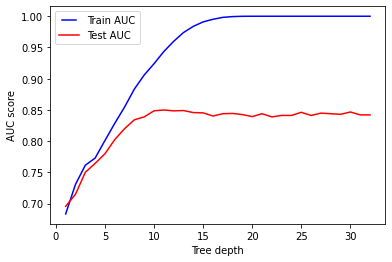

In [163]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=max_depth))
    pipeline.fit(X_train, y_train) 
    train_pred = pipeline.predict(X_train)
    train_pred=[int(item.lower() == 't') for item in train_pred]
    y_train_binary = [int(item.lower() == 't') for item in y_train]
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train_binary, train_pred, pos_label=1)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)   
    y_pred = pipeline.predict(X_test)
    y_pred = [int(item.lower() == 't') for item in y_pred]
    y_test_binary = [int(item.lower() == 't') for item in y_test]
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test_binary, y_pred, pos_label=1)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [164]:
tree = pipeline.named_steps['decisiontreeclassifier']
dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [165]:
pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=11))
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8512511584800742

In [168]:
train_features = train.drop(columns=['player1_winner','player1_ioc', 'player2_ioc', 'best_of', 'round','player1_id', 'player2_id', 'player1_rank_points','player2_rank_points'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
catagorical_features = cardinality[cardinality<=50].index.tolist()
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train['player1_winner']
X_test = test[features]
y_test = test['player1_winner']

In [169]:
pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier())

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8424467099165894

In [170]:
tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

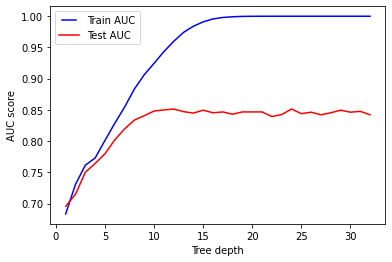

In [171]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=max_depth))
    pipeline.fit(X_train, y_train) 
    train_pred = pipeline.predict(X_train)
    train_pred=[int(item.lower() == 't') for item in train_pred]
    y_train_binary = [int(item.lower() == 't') for item in y_train]
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train_binary, train_pred, pos_label=1)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)   
    y_pred = pipeline.predict(X_test)
    y_pred = [int(item.lower() == 't') for item in y_pred]
    y_test_binary = [int(item.lower() == 't') for item in y_test]
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test_binary, y_pred, pos_label=1)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [172]:
pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=11))
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8503243744207599

In [173]:
y_pred_proba = pipeline.predict_proba(X_test)[:, -1]
metrics.roc_auc_score(y_test, y_pred_proba)

0.8951942634891839

In [126]:
#!pip uninstall Jinja2 MarkupSafe pandas-profiling
#!pip install Jinja2==3.1.1 MarkupSafe==2.0.1 pandas-profiling==3.1.0

In [127]:
#from pandas_profiling import ProfileReport
#from pandas_profiling import ProfileReport
#profile = ProfileReport(train, minimal=True).to_notebook_iframe()
#profile

In [183]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1)
)


pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_test, y_test))

Validation Accuracy 0.8887859128822985


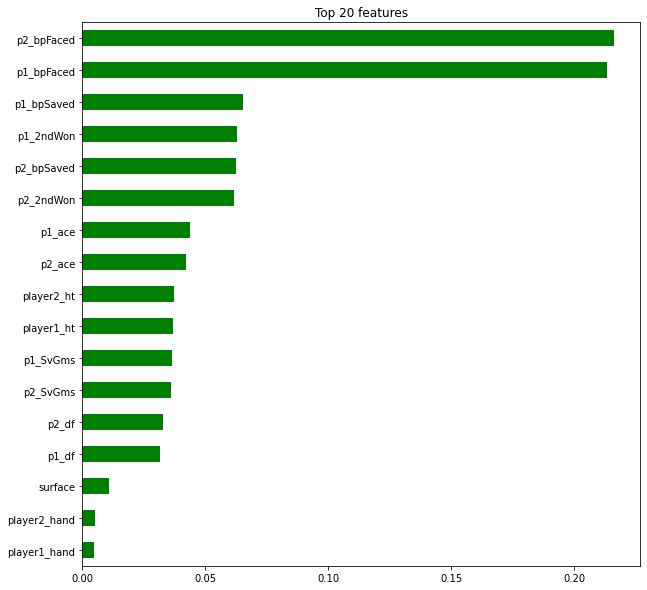

In [184]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='green');

In [185]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)
X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [186]:


permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_test_transformed, y_test)

PermutationImportance(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

In [187]:
feature_names = X_test.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names)

In [188]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]
#X_val = X_val[features]
X_test = X_test[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_test, y_test))

Validation Accuracy 0.8892493049119555


In [189]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Validation Accuracy', accuracy_score(y_test, y_pred))

# 1% increase using boosting !!! Hoorraaaaaay ! 

Validation Accuracy 0.9138090824837812


In [193]:
train_features = train.drop(columns=['player1_winner','player1_ioc', 'player2_ioc', 'best_of', 'round','player1_id', 'player2_id', 'player1_rank_points','player2_rank_points','player1_rank','player2_rank','player1_ht','player2_ht','surface'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
catagorical_features = cardinality[cardinality<=50].index.tolist()
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train['player1_winner']
X_test = test[features]
y_test = test['player1_winner']

In [200]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, learning_rate=0.4)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Validation Accuracy', accuracy_score(y_test, y_pred))

Validation Accuracy 0.9369786839666358


In [190]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

model = XGBClassifier(
    n_estimators=1000, 
    max_depth=7,     
    learning_rate=0.5,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='error', 
          early_stopping_rounds=50)

[0]	validation_0-error:0.147509	validation_1-error:0.176552
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.109466	validation_1-error:0.144578
[2]	validation_0-error:0.093512	validation_1-error:0.126506
[3]	validation_0-error:0.083367	validation_1-error:0.115385
[4]	validation_0-error:0.070032	validation_1-error:0.104727
[5]	validation_0-error:0.062423	validation_1-error:0.090361
[6]	validation_0-error:0.055469	validation_1-error:0.091288
[7]	validation_0-error:0.052524	validation_1-error:0.082947
[8]	validation_0-error:0.046961	validation_1-error:0.084337
[9]	validation_0-error:0.04107	validation_1-error:0.079703
[10]	validation_0-error:0.036407	validation_1-error:0.082947
[11]	validation_0-error:0.033134	validation_1-error:0.08202
[12]	validation_0-error:0.031171	validation_1-error:0.079703
[13]	validation_0-error:0.030762	validation_1-error:0.0773

XGBClassifier(learning_rate=0.5, max_depth=7, n_estimators=1000, n_jobs=-1)

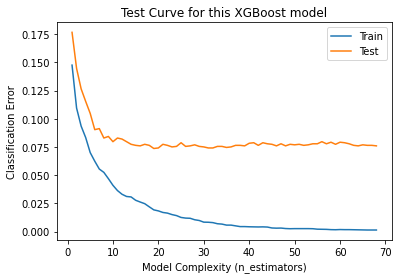

In [191]:
results = model.evals_result()
train_error = results['validation_0']['error']
test_error = results['validation_1']['error']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, test_error, label='Test')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Test Curve for this XGBoost model')
plt.legend();

In [192]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [138]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature_pdp_1 = 'p1_bpFaced'

isolated = pdp_isolate(
    model = pipeline,
    dataset=X_test,
    model_features = X_test.columns, 
    feature = feature_pdp_1
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='p1_bpFaced'>})

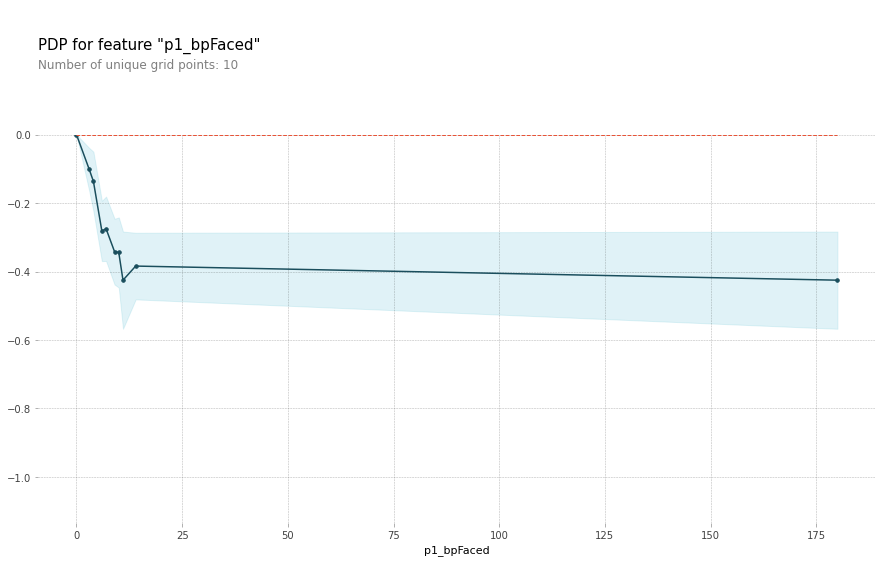

In [139]:
pdp_plot(isolated, feature_name= feature_pdp_1)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='p1_bpFaced'>})

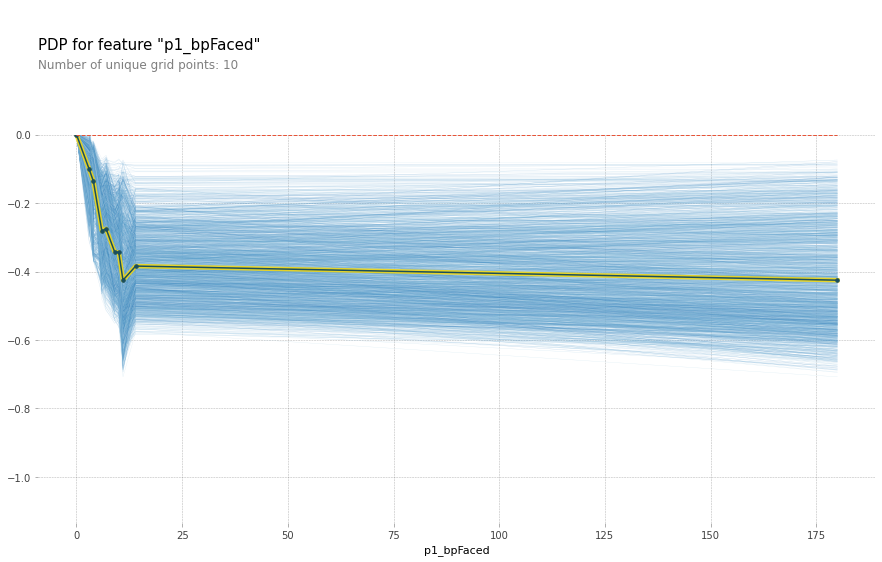

In [140]:
pdp_plot(isolated, feature_name= feature_pdp_1, plot_lines=True, frac_to_plot=1)

In [141]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [142]:
features_pdp_2 = ['p1_bpFaced', 'p1_ace']

interactions = pdp_interact(
    model=pipeline,
    dataset = X_test, 
    model_features = X_test.columns,
    features=features_pdp_2
)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_inter_ax': <AxesSubplot:xlabel='p1_bpFaced', ylabel='p1_ace'>})

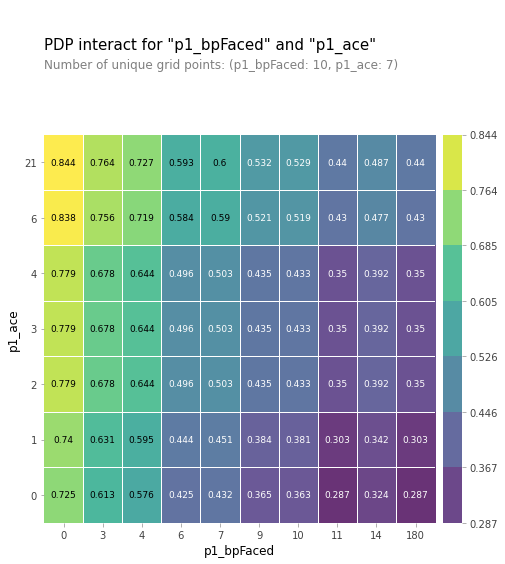

In [143]:
pdp_interact_plot(interactions, plot_type='grid',feature_names=features_pdp_2)

In [144]:
pdp = interactions.pdp.pivot_table(
    values='preds', 
    columns=features_pdp_2[0], 
    index=features_pdp_2[1]
)[::-1] 

In [145]:
import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title='player1_winner')
    )
)

fig = go.Figure(surface, layout)
fig.show()

In [146]:
# Shap values 
import shap
from sklearn.impute import SimpleImputer


processor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(strategy='most_frequent',))

X_train_processed= processor.fit_transform(X_train)
X_test_processed= processor.transform(X_test)

eval_set = [(X_train_processed, y_train), 
            (X_test_processed, y_test)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)



[0]	validation_0-auc:0.718323	validation_1-auc:0.746674
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.734662	validation_1-auc:0.766345
[2]	validation_0-auc:0.744666	validation_1-auc:0.773762
[3]	validation_0-auc:0.758495	validation_1-auc:0.784093
[4]	validation_0-auc:0.767147	validation_1-auc:0.78948
[5]	validation_0-auc:0.767237	validation_1-auc:0.790779
[6]	validation_0-auc:0.778757	validation_1-auc:0.797631
[7]	validation_0-auc:0.792034	validation_1-auc:0.810293
[8]	validation_0-auc:0.801225	validation_1-auc:0.819573
[9]	validation_0-auc:0.805954	validation_1-auc:0.822332
[10]	validation_0-auc:0.814083	validation_1-auc:0.829429
[11]	validation_0-auc:0.820005	validation_1-auc:0.83456
[12]	validation_0-auc:0.82187	validation_1-auc:0.832974
[13]	validation_0-auc:0.822252	validation_1-auc:0.834316
[14]	validation_0-auc:0.825736	validation_1-auc:0.837773
[

XGBClassifier(n_estimators=1000, n_jobs=-1)

In [147]:
row = X_test.iloc[[1]]

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value, 
    shap_values=shap_values, 
    features=row,
    link='logit'
)

In [148]:
from sklearn.linear_model import LogisticRegression

pipeline_logreg = make_pipeline(
    ce.OrdinalEncoder(), 
    LogisticRegression(solver='lbfgs')
)

pipeline_logreg.fit(X_train, y_train)
pipeline_logreg.predict(X_test)

pipeline_logreg.score(X_test, y_test)
# Beats the initial baseline

0.6153846153846154